# LINEAR SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import libsvm
from libsvm.svmutil import *

%matplotlib inline

## 3.1 Linear Support Vector Machine on toy data

### 3.1.1 
Generate a training set of size $100$ with 2D features (X) drawn at random as follows:
* X_{neg} $\sim$ $\mathcal{N}$([-5, -5], 5*$I_2$) and correspond to negative labels (-1)
* X_{pos} $\sim$ $\mathcal{N}$([5, 5], 5*$I_2$) and correspond to positive labels (+1)
<br />
Accordingly, $X = [X_{neg}, X_{pos}]$ is a $100\times2$ array, Y is a $100\times1$ array of values $\in \{-1, 1\}$.
<p/>Draw a scatter plot of the full training dataset with the points colored according to their labels.

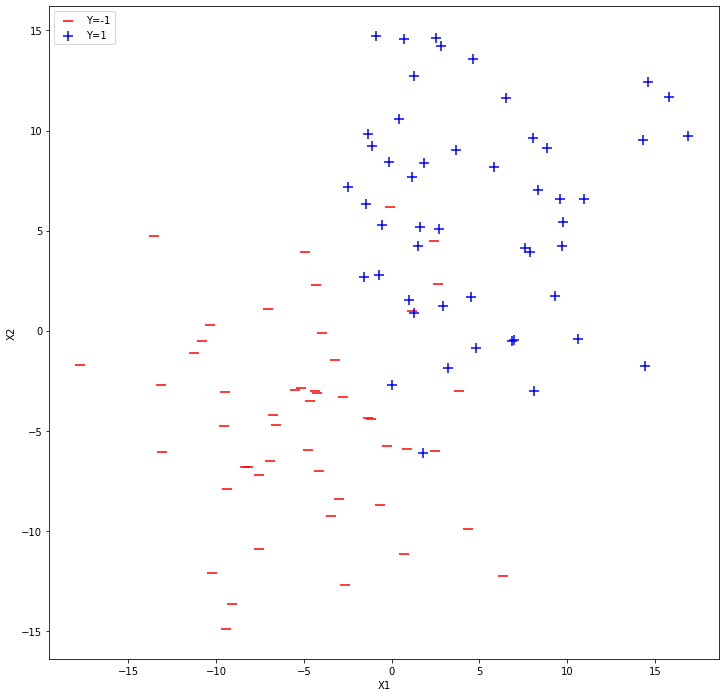

In [2]:
# Generate binary class dataset
np.random.seed(0)

n_samples = 100
center_1 = [-5, -5]
center_2 = [5, 5]

# Generate Data:
# generate normals independently, since no covariance
Xneg = np.array([np.array([np.random.normal(-5, 5), np.random.normal(-5,5)]) for i in range(50)])
Xpos = np.array([np.array([np.random.normal(5, 5), np.random.normal(5,5)]) for i in range(50)])
X = np.array([obs for obs in Xneg] + [obs for obs in Xpos])
Y = [-1]*50 + [1]*50

# Scatter plot:
# plt.scatter(X[:,0], X[:,1], c=Y)
# graphing separately to add nice labels
plt.figure(figsize=(12,12))
plt.scatter(X[:50,0], X[:50,1], c='r', marker = "_", label='Y=-1', s=100)
plt.scatter(X[50:,0], X[50:,1], c='b', marker = "+", label='Y=1', s=100)
plt.legend(loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3.1.2 
Train a linear support vector machine on the data with $C=1$ and draw the decision boundary line that separates o and x. Mark the support vectors separately (ex.circle around the point). 

Note: You can use the libsvm.svmutil functions with the kernel_type set to 0, indiciating a linear kernel and svm_type set to 0 indicating C-SVC.
Also note that the support_vector coefficients returned by the LIBSVM model are the dual coefficients.

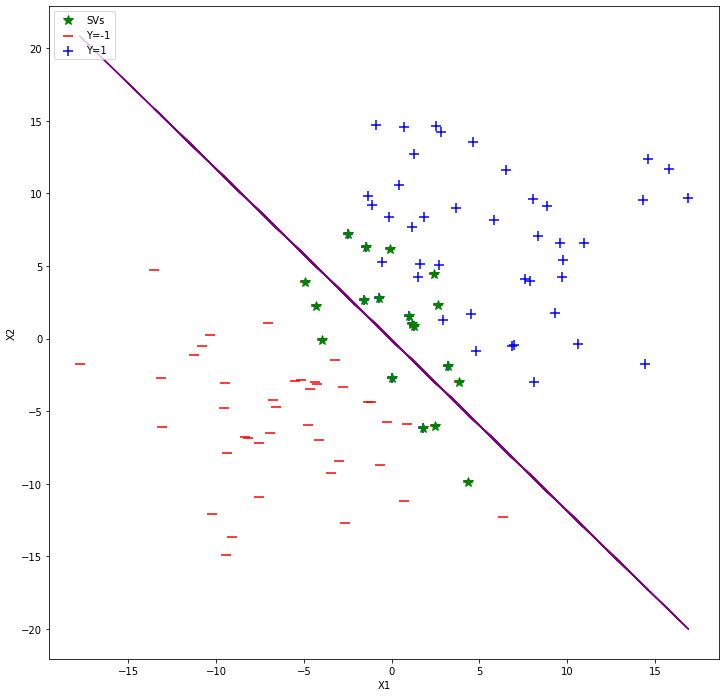

In [3]:
# Define the SVM problem
problem = svm_problem(Y, X)

# Define the hyperparameters
C=1
params = svm_parameter('-s 0 -t 0 -c '+ str(C))

# Train the model
m = svm_train(problem, params)

# Compute the slope and intercept of the separating line/hyperplanee with the use of the support vectors
# and other information from the LIBSVM model.
# set intercept first
coefs = [-m.rho.contents.value] + [0]*len(X[0])

# get support vectors (the only points that have nonzero alpha)
supp_vecs = np.array([np.array([sv[i] for i in sv.keys()]) for sv in m.get_SV()])
dual_coefs = np.array([alpha[0] for alpha in m.get_sv_coef()])

for i in range(len(supp_vecs)):
    for k in range(len(supp_vecs[i])):
        coefs[k+1] = coefs[k+1] + supp_vecs[i][k]*dual_coefs[i]

# Draw the scatter plot, the decision boundary line, and mark the support vectors.
# solve for feature 2 in terms of feature 1
x1 = []
x2 = []
x2_neg = []
x2_pos = []
for i in range(len(X)):
    x1.append(X[i][0])
    x2.append(-(coefs[1]/coefs[2])*x1[i] - (coefs[0]/coefs[2]))
    x2_neg.append((1/coefs[2]) - (coefs[1]/coefs[2])*x1[i] - (coefs[0]/coefs[2]))
    x2_pos.append((-1/coefs[2]) - (coefs[1]/coefs[2])*x1[i] - (coefs[0]/coefs[2]))

# the support vectors/misclassifications
supp_vecs_x = []
supp_vecs_y = []
for sv in supp_vecs:
    supp_vecs_x.append(sv[0])
    supp_vecs_y.append(sv[1])

plt.figure(figsize=(12,12))

plt.plot(x1,x2, color='purple')
plt.scatter(Xneg[:,0], Xneg[:,1], c='r', marker = "_", label='Y=-1', s=100)
plt.scatter(Xpos[:,0], Xpos[:,1], c='b', marker = "+", label='Y=1', s=100)

plt.plot(supp_vecs_x, supp_vecs_y, 'g*', markersize=10, label="SVs")

plt.legend(loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3.1.3 
Draw a line that separates the data for 8 different $C$ ($10^{-5}$~$10^7$).
Plot the number of support vectors vs. $C$ (plot x-axis on a log scale).
How does the number of support vectors change as $C$ increases and why does it change like that? 

Note: You might prefer to use the command-line style of svm_parameter initialization such as: svm_parameter('-s 0 -t 0') to indicate a linear kernel and C-SVC as the SVM type.


My answer: The number of support vectors decreases as $C$ becomes large because the cost of violating the constraint increases. Thus, for each increase in $C$, the margin becomes smaller, and so fewer examples fall between the observations.

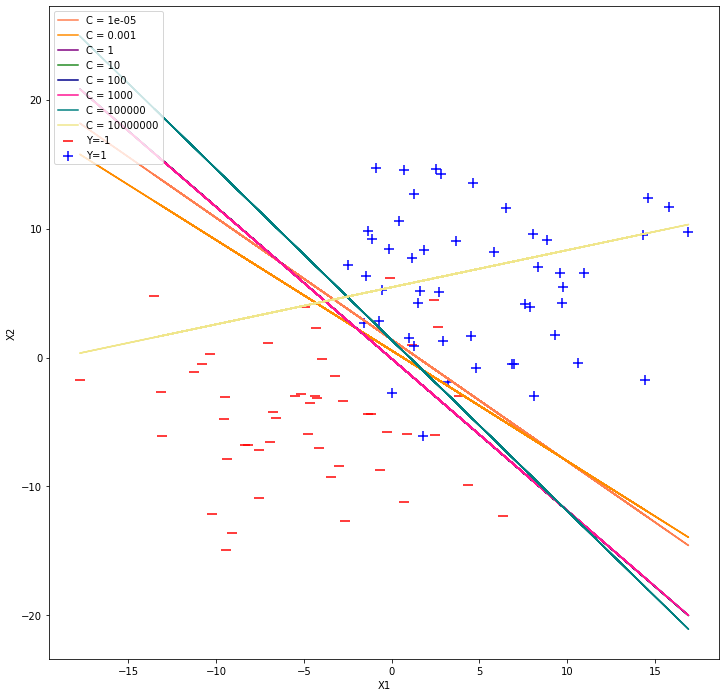

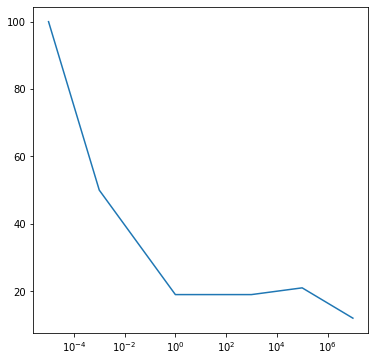

In [4]:
C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []

# for colors
iters = 0
colors = ['coral', 'darkorange', 'purple', 'forestgreen', 'darkblue', 'deeppink', 'teal', 'khaki']

plt.figure(figsize=(12,12))
problem = svm_problem(Y,X)

# Loop over a similar setup to that in the previous code block.
for C in C_range:
    params = svm_parameter('-s 0 -t 0 -c '+ str(C))

    # Train the model
    m = svm_train(problem, params)

    # Compute the slope and intercept of the separating line/hyperplanee with the use of the support vectors
    # and other information from the LIBSVM model.
    # set intercept first
    coefs = [-m.rho.contents.value] + [0]*len(X[0])

    # get support vectors (the only points that have nonzero alpha)
    supp_vecs = np.array([np.array([sv[i] for i in sv.keys()]) for sv in m.get_SV()])
    dual_coefs = np.array([alpha[0] for alpha in m.get_sv_coef()])
    
    num_sv.append(len(supp_vecs))
    
    for i in range(len(supp_vecs)):
        for k in range(len(supp_vecs[i])):
            coefs[k+1] = coefs[k+1] + supp_vecs[i][k]*dual_coefs[i]

    # Draw the scatter plot, the decision boundary line, and mark the support vectors.
    # solve for feature 2 in terms of feature 1
    x1 = []
    x2 = []
    for i in range(len(X)):
        x1.append(X[i][0])
        x2.append(-(coefs[1]/coefs[2])*x1[i] - (coefs[0]/coefs[2]))

    plt.plot(x1,x2, color=colors[iters], label='C = ' + str(C))
    iters = iters + 1

# Draw the scatter plot with multiple decision lines on top (one for each value of C)
plt.scatter(Xneg[:,0], Xneg[:,1], c='r', marker = "_", label='Y=-1', s=100)
plt.scatter(Xpos[:,0], Xpos[:,1], c='b', marker = "+", label='Y=1', s=100)
plt.legend(loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Draw the num_sv vs. C plot.
plt.figure(figsize=(6,6))
plt.plot(C_range, num_sv)
plt.xscale('log')
plt.show()

### 3.1.4 
Now try rescaling the data to the [0,1] range and repeat the steps of the previous question (3.1.3) and over the same range of $C$ values. Are the decision boundaries different from those in the previous question? What does this imply about (a) the geometric margin and (b) the relative effect of each feature on the predictions of the trained model ?

#### Solution below: 
SVM tries to maximize the distance between the separating plane and the support vectors. 
If one feature (i.e. one dimension in this space) has very large values, 
it will dominate the other features when calculating the distance. If you rescale all 
features (e.g. to [0, 1]), they all have the same influence on the distance metric.



In [5]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Single line below:
X_train_minmax = min_max_scaler.fit_transform(X)

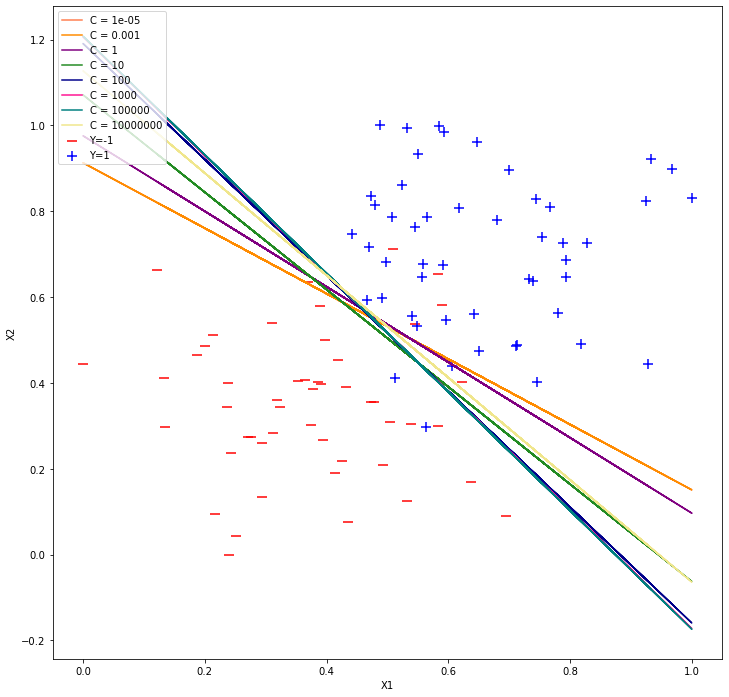

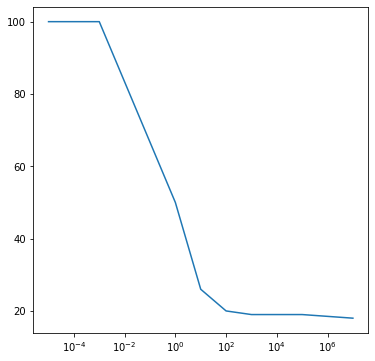

In [6]:
C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []

# for colors
iters = 0
colors = ['coral', 'darkorange', 'purple', 'forestgreen', 'darkblue', 'deeppink', 'teal', 'khaki']

plt.figure(figsize=(12,12))
problem = svm_problem(Y,X_train_minmax)

# Loop over a similar setup to that in the previous code block.
for C in C_range:
    params = svm_parameter('-s 0 -t 0 -c '+ str(C))

    # Train the model
    m = svm_train(problem, params)

    # Compute the slope and intercept of the separating line/hyperplanee with the use of the support vectors
    # and other information from the LIBSVM model.
    # set intercept first
    coefs = [-m.rho.contents.value] + [0]*len(X_train_minmax[0])

    # get support vectors (the only points that have nonzero alpha)
    supp_vecs = np.array([np.array([sv[i] for i in sv.keys()]) for sv in m.get_SV()], dtype=object)
    dual_coefs = np.array([alpha[0] for alpha in m.get_sv_coef()])
    
    # add number of support vectors to list
    num_sv.append(len(supp_vecs))
    
    # calculate coefficients using the formula
    for i in range(len(supp_vecs)):
        for k in range(len(supp_vecs[i])):
            coefs[k+1] = coefs[k+1] + supp_vecs[i][k]*dual_coefs[i]

    # Draw the scatter plot, the decision boundary line, and mark the support vectors.
    # solve for feature 2 in terms of feature 1
    x1 = []
    x2 = []
    for i in range(len(X_train_minmax)):
        x1.append(X_train_minmax[i][0])
        x2.append(-(coefs[1]/coefs[2])*x1[i] - (coefs[0]/coefs[2]))
    
    # add line to plot
    plt.plot(x1,x2, color=colors[iters], label='C = ' + str(C))
    iters = iters + 1

# Draw the scatter plot with multiple decision lines on top (one for each value of C)
plt.scatter(X_train_minmax[:50,0], X_train_minmax[:50,1], c='r', marker = "_", label='Y=-1', s=100)
plt.scatter(X_train_minmax[50:,0], X_train_minmax[50:,1], c='b', marker = "+", label='Y=1', s=100)
plt.legend(loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Draw the num_sv vs. C plot.
plt.figure(figsize=(6,6))
plt.plot(C_range, num_sv)
plt.xscale('log')
plt.show()

## *Penguins*

Multiclass SVM. In this problem, we will use support vector machines to classify penguins species based on the given features.

Load in the penguins data using from the provided penguins.csv file on Sakai. Preprocess the features. Then we will use the train_test_split from sklearn to split the data into training and testing into a 0.8 : 0.2 ratio.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load data
df = pd.read_csv('../../Datasets/penguins.csv')
df = df.dropna()

# one vs all as 0 vs rest
target = df.loc[:,'Species'].apply(lambda s: 1 if s == 0 else -1)
df['Target'] = target
df = df.drop(['Species'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target'], axis=1).to_numpy(), df['Target'].to_numpy(), test_size=0.2, random_state=1)

Plot test accuracy and the number of support vectors (two separate plots) vs. $C$ for $C=10^{-12}$~$10^{12}$ (plot 7 points or more with the x-axis on a log scale). 

Accuracy = 57.971% (40/69) (classification)
Accuracy = 66.6667% (46/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 92.7536% (64/69) (classification)


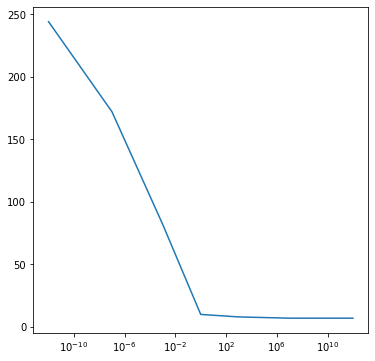

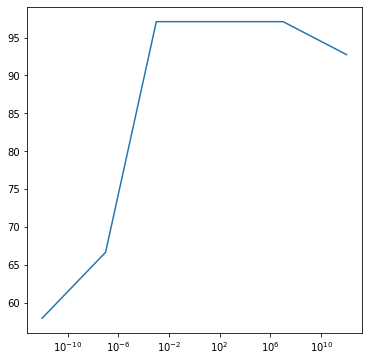

In [8]:
C_range = [10**-12, 10**-7, 10**-3, 1, 10**3, 10**7, 10**12]
num_sv = []
test_acc = []
models = []

# Loop over a similar setup to that in the previous code block.
for C in C_range:
    # define problem, using training data
    problem = svm_problem(y_train, X_train)
    
    # define parameters, changing C
    params = svm_parameter('-s 0 -t 0 -c '+ str(C) + ' -q')
    
    # Train the model
    models.append(svm_train(problem, params))
    
    # add number of support vectors to list
    num_sv.append(len(models[len(models)-1].get_SV()))
    
    # do prediction
    predictions, acc, p_vals = svm_predict(y_test, X_test, models[len(models)-1])
    
    # save accuracy in list
    test_acc.append(acc[0])
    
# Draw the num_sv vs. C plot.
plt.figure(figsize=(6,6))
plt.plot(C_range, num_sv)
plt.xscale('log')
plt.show()

# Draw the acc vs. C plot.
plt.figure(figsize=(6,6))
plt.plot(C_range, test_acc)
plt.xscale('log')
plt.show()

Calculate variable importance (CulmenLength, CulmenDepth, FlipperLength, BodyMass) with your classifier. Rank these variables/ features from most important to the least important. Utilize three strategies covered in the class:
* model reliance
* conditional model reliance
* algorithm reliance

Do all three give the same result?


In [9]:
# list of features
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

# hinge loss function
def hinge(ys, preds):
    loss = 0
#     ys = np.ndarray.tolist(ys)
    for i in range(len(ys)):
        loss = loss + max(0, 1 - preds[i]*ys[i])
    
    return loss

In [10]:
# model reliance function: calculates hinge loss, shuffles, calculates again, then subtracts
def model_reliance(m, feature_to_scramble, x_t, y_t):
    # old loss
    predictions, acc, p_vals = svm_predict(y_t, x_t, m)
    
    old_loss = hinge(y_t, predictions)
    
    # shuffle the feature_to_scramble'th column
    # get the column to scramble
    scramble = []
    for x in x_t:
        scramble.append(x[feature_to_scramble])

    np.random.shuffle(scramble)
    
    # save new X variables
    x_scrambled = np.copy(x_t)
    for i in range(len(scramble)):
        x_scrambled[i, feature_to_scramble] = scramble[i]
    
    # get new predictions after scrambling
    new_predictions, acc, p_vals = svm_predict(y_t, x_scrambled, m)
    
    # find loss of those predictions
    new_loss = hinge(y_t, new_predictions)
    
    return new_loss/old_loss

# save model reliance for each feature
iters = 20
models = []
mrs = []

# create list for averaging
for i in range(len(features)):
    mrs.append([0]*iters)

for i in range(iters):
    for feature in range(len(features)):
        # define problem, using training data
        problem = svm_problem(y_train, X_train)

        # set parameters
        C = 1000
        params = svm_parameter('-s 0 -t 0 -c ' + str(C) + ' -q')

        # train model
        models.append(svm_train(problem, params))
        
        # calculate mr based on hinge loss
        mr = model_reliance(models[feature], feature, X_test, y_test)
        
        # add model reliance to list
        mrs[feature][i] = mr

for i in range(len(mrs)):
    mrs[i] = sum(mrs[i])/len(mrs[i])
    
print()
number_words = ["first", "second", "third", "fourth"]
mrs_sorted = sorted(mrs, key = lambda a: abs(a), reverse = True)
statement = "So the variables in order of importance are:"

print("Model Reliance \n")
for i in range(len(mrs_sorted)):
    feature = mrs.index(mrs_sorted[i])
    print("The " + number_words[i] + " most important variable is " + features[feature] + 
          " with model reliance, measured as absolute value of change in loss, of " + str(mrs[feature]) + "\n")
    
    statement = statement + " " + str(i+1) + ") " + features[feature]

print(statement + ". \n")


Accuracy = 97.1014% (67/69) (classification)
Accuracy = 56.5217% (39/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 78.2609% (54/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 52.1739% (36/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 84.058% (58/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 100% (69/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 95.6522% (66/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 53.6232% (37/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 82.6087% (57/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1

In [11]:
from sklearn.kernel_ridge import KernelRidge

# conditional model reliance
def conditional_model_reliance(clf, m, feature_to_scramble, x_t, y_t):
    # old loss
    predictions, acc, p_vals = svm_predict(y_t, x_t, m)
    
    old_loss = hinge(y_t, predictions)
    
    # test dataframe and get kernel data
    test_df = pd.DataFrame(np.copy(x_t))
    test_target = test_df.iloc[:,feature_to_scramble:feature_to_scramble+1].to_numpy()
    test_features = test_df.drop([feature_to_scramble], axis = 1).to_numpy()
    
    # predict with kernel least squares
    kernel_predictions = clf.predict(test_features)
    
    # subtract "information" from other features
    subtract_information = test_target - kernel_predictions
    
    # shuffle predictions points
    np.random.shuffle(kernel_predictions)
    
    # add them in to get scrambled
    target_scrambled = subtract_information + kernel_predictions
    
    # update new information with scrambled
    x_scrambled = np.copy(x_t)
    
    for i in range(len(target_scrambled)):
        x_scrambled[i,feature_to_scramble] = target_scrambled[i]

    # get new predictions after scrambling
    new_predictions, acc, p_vals = svm_predict(y_t, x_scrambled, m)
    
    # find loss of those predictions
    new_loss = hinge(y_t, new_predictions)
    
    return new_loss/old_loss

# save model reliance for each feature
iters = 20
models = []
mrs = []

# create list for averaging
for i in range(len(features)):
    mrs.append([0]*iters)

    
train_df = pd.DataFrame(np.copy(X_train))
for i in range(iters):
    for feature in range(len(features)):
        # define problem, using training data
        problem = svm_problem(y_train, X_train)

        # set parameters
        C = 1000
        params = svm_parameter('-s 0 -t 0 -c ' + str(C) + ' -q')

        # train model
        models.append(svm_train(problem, params))
        
        # kernel least squares on training set to train
        train_target = train_df.iloc[:, feature:feature+1].to_numpy()
        train_features = train_df.drop([feature], axis = 1).to_numpy()

        clf = KernelRidge(alpha = 1.0)
        clf.fit(train_features, train_target)
        
        # calculate mr based on hinge loss
        mr = conditional_model_reliance(clf, models[feature], feature, X_test, y_test)
        
        # add model reliance to list
        mrs[feature][i] = mr

for i in range(len(mrs)):
    mrs[i] = sum(mrs[i])/len(mrs[i])

print(mrs)
    
print()
number_words = ["first", "second", "third", "fourth"]
mrs_sorted = sorted(mrs, key = lambda a: abs(a), reverse = True)
statement = "So the variables in order of importance are:"

print("Conditional Model Reliance \n")
for i in range(len(mrs_sorted)):
    feature = mrs.index(mrs_sorted[i])
    print("The " + number_words[i] + " most important variable is " + features[feature] + 
          " with model reliance, measured as absolute value of change in loss, of " + str(mrs[feature]) + "\n")
    
    statement = statement + " " + str(i+1) + ") " + features[feature]

print(statement + ". \n")


Accuracy = 97.1014% (67/69) (classification)
Accuracy = 60.8696% (42/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 95.6522% (66/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 76.8116% (53/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 95.6522% (66/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 92.7536% (64/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 81.1594% (56/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 94.2029% (65/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 94.2029% (65/69) (classification)
Accuracy =

In [12]:
from sklearn.kernel_ridge import KernelRidge

# conditional model reliance
def algorithm_reliance(feature_to_omit, x_tr, y_tr, x_te, y_te):
    # old loss
    problem = svm_problem(y_tr, x_tr)
    params = svm_parameter('-s 0 -t 0 -c 1000 -q')
    m_old = svm_train(problem, params)

    # predict
    predictions, acc, p_vals = svm_predict(y_te, x_te, m_old)
    
    old_loss = hinge(y_te, predictions)
    
    # get new features with one omission
    x_tr_df = pd.DataFrame(np.copy(x_tr))
    x_tr_omit = x_tr_df.drop([feature_to_omit], axis = 1).to_numpy()
    
    x_te_df = pd.DataFrame(np.copy(x_te))
    x_te_omit = x_te_df.drop([feature_to_omit], axis = 1).to_numpy()
    
    # new loss
    problem = svm_problem(y_tr, x_tr_omit)
    params = svm_parameter('-s 0 -t 0 -c 1000 -q')
    m_new = svm_train(problem, params)
    
    # predict
    new_predictions, acc, p_vals = svm_predict(y_te, x_te_omit, m_new)
    
    # find loss of those predictions
    new_loss = hinge(y_te, new_predictions)
    
    return new_loss/old_loss

# save model reliance for each feature
iters = 20
models = []
mrs = []

# create list for averaging
for i in range(len(features)):
    mrs.append([0]*iters)

    
train_df = pd.DataFrame(np.copy(X_train))
for i in range(iters):
    for feature in range(len(features)):
        # calculate mr based on hinge loss
        mr = algorithm_reliance(feature, X_train, y_train, X_test, y_test)
        
        # add model reliance to list
        mrs[feature][i] = mr

for i in range(len(mrs)):
    mrs[i] = sum(mrs[i])/len(mrs[i])

print(mrs)
    
print()
number_words = ["first", "second", "third", "fourth"]
mrs_sorted = sorted(mrs, key = lambda a: abs(a), reverse = True)
statement = "So the variables in order of importance are:"

print("Conditional Model Reliance \n")
for i in range(len(mrs_sorted)):
    feature = mrs.index(mrs_sorted[i])
    print("The " + number_words[i] + " most important variable is " + features[feature] + 
          " with model reliance, measured as absolute value of change in loss, of " + str(mrs[feature]) + "\n")
    
    statement = statement + " " + str(i+1) + ") " + features[feature]

print(statement + ". \n")


Accuracy = 97.1014% (67/69) (classification)
Accuracy = 78.2609% (54/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 85.5072% (59/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 95.6522% (66/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 78.2609% (54/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 85.5072% (59/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 95.6522% (66/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 78.2609% (54/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 85.5072% (59/69) (classification)
Accuracy =

# Boosting a decision stump

The goal of this notebook is to implement your own boosting module.

* Go through an implementation of decision trees.
* Implement Adaboost ensembling.
* Use your implementation of Adaboost to train a boosted decision stump ensemble.
* Evaluate the effect of boosting (adding more decision stumps) on performance of the model.
* Explore the robustness of Adaboost to overfitting.

*This file is adapted from course material by Carlos Guestrin and Emily Fox.*

Let's get started!

## Import some libraries

In [13]:
## please make sure that the packages are updated to the newest version. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Getting the data ready

Load the dataset.

In [14]:
loans = pd.read_csv('../../Datasets/loan_small.csv')

### Recoding the target column

We re-assign the target to have +1 as a safe (good) loan, and -1 as a risky (bad) loan. In the next cell, the features are also briefly explained. 

In [15]:
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]

loans['safe_loans'] = loans['loan_status'].apply(lambda x : +1 if x=='Fully Paid' else -1)

## please update pandas to the newest version in order to execute the following line
loans.drop(columns=['loan_status'], inplace=True)

target = 'safe_loans' # this variable will be used later

### Transform categorical data into binary features

In this assignment, we will work with **binary decision trees**. Since all of our features are currently categorical features, we want to turn them into binary features using 1-hot encoding. 

We can do so with the following code block:

In [16]:
loans = pd.get_dummies(loans)

Let's see what the feature columns look like now:

In [17]:
features = list(loans.columns)
features.remove('safe_loans')  # Remove the response variable
features

['term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year']

### Train-test split

We split the data into training and test sets with 80% of the data in the training set and 20% of the data in the test set. We use `seed=1` so that everyone gets the same result.

In [18]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(loans, test_size = 0.2, random_state=1)

# Weighted decision trees

Since the data weights change as we build an AdaBoost model, we need to first code a decision tree that supports weighting of individual data points.

### Weighted error definition

Consider a model with $N$ data points with:
* Predictions $\hat{y}_1 ... \hat{y}_n$ 
* Target $y_1 ... y_n$ 
* Data point weights $\alpha_1 ... \alpha_n$.

Then the **weighted error** is defined by:
$$
\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}]}{\sum_{i=1}^{n} \alpha_i}
$$
where $1[y_i \neq \hat{y_i}]$ is an indicator function that is set to $1$ if $y_i \neq \hat{y_i}$.


### Write a function to compute weight of mistakes

Write a function that calculates the weight of mistakes for making the "weighted-majority" predictions for a dataset. The function accepts two inputs:
* `labels_in_node`: Targets $y_1 ... y_n$ 
* `data_weights`: Data point weights $\alpha_1 ... \alpha_n$

We are interested in computing the (total) weight of mistakes, i.e.
$$
\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}].
$$
This quantity is analogous to the number of mistakes, except that each mistake now carries different weight. It is related to the weighted error in the following way:
$$
\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})}{\sum_{i=1}^{n} \alpha_i}
$$

The function **intermediate_node_weighted_mistakes** should first compute two weights: 
 * $\mathrm{WM}_{-1}$: weight of mistakes when all predictions are $\hat{y}_i = -1$ i.e $\mathrm{WM}(\mathbf{\alpha}, \mathbf{-1}$)
 * $\mathrm{WM}_{+1}$: weight of mistakes when all predictions are $\hat{y}_i = +1$ i.e $\mbox{WM}(\mathbf{\alpha}, \mathbf{+1}$)
 
 where $\mathbf{-1}$ and $\mathbf{+1}$ are vectors where all values are -1 and +1 respectively.
 
After computing $\mathrm{WM}_{-1}$ and $\mathrm{WM}_{+1}$, the function **intermediate_node_weighted_mistakes** should return the lower of the two weights of mistakes, along with the class associated with that weight. We have provided a skeleton for you with `YOUR CODE HERE` to be filled in several places.

In [19]:
def intermediate_node_weighted_mistakes(labels_in_node, data_weights):
    
    # Sum the weights of all entries with label +1
    total_weight_positive = sum(data_weights[labels_in_node == +1])
    
    # Weight of mistakes for predicting all -1's is equal to the sum above
    ### YOUR CODE HERE
    wm_neg = (total_weight_positive, -1)
    
    # Sum the weights of all entries with label -1
    ### YOUR CODE HERE
    total_weight_negative = sum(data_weights[labels_in_node == -1])
    
    # Weight of mistakes for predicting all +1's is equal to the sum above
    ### YOUR CODE HERE
    wm_pos = (total_weight_negative, +1)
    
    # Return the tuple (weight, class_label) representing the lower of the two weights
    #    class_label should be an integer of value +1 or -1.
    # If the two weights are identical, return (weighted_mistakes_all_positive,+1)
    ### YOUR CODE HERE
    return wm_neg if total_weight_positive < total_weight_negative else wm_pos

**Checkpoint:** Test your **intermediate_node_weighted_mistakes** function, run the following cell:

In [20]:
example_labels = pd.Series([-1, -1, 1, 1, 1])
example_data_weights = pd.Series([1., 2., .5, 1., 1.])
if intermediate_node_weighted_mistakes(example_labels, example_data_weights) == (2.5, -1):
    print('Test passed!')
else:
    print('Test failed... try again!')

Test passed!


Recall that the **classification error** is defined as follows:
$$
\mbox{classification error} = \frac{\mbox{# mistakes}}{\mbox{# all data points}}
$$


### Function to pick best feature to split on

The next step is to pick the best feature to split on.

The **best_splitting_feature** function takes the data, the festures, the targetm and the data weights as input and returns the best feature to split on.
  
Complete the following function.

In [21]:
# If the data is identical in each feature, this function should return None

def best_splitting_feature(data, features, target, data_weights):
    
    # These variables will keep track of the best feature and the corresponding error
    best_feature = None
    best_error = float('+inf') 
    num_points = float(len(data))

    # Loop through each feature to consider splitting on that feature
    for feature in features:
        
        # The left split will have all data points where the feature value is 0
        # The right split will have all data points where the feature value is 1
        left_split = data[data[feature] == 0]
        right_split = data[data[feature] == 1]
        
        # Apply the same filtering to data_weights to create left_data_weights, right_data_weights
        ## YOUR CODE HERE
        left_weights = data_weights[data[feature] == 0]
        right_weights = data_weights[data[feature] == 1]
        
        # Calculate the weight of mistakes for left and right sides
        ## YOUR CODE HERE
        # save targets of splits
        left_targets = pd.Series(left_split[target])
        right_targets = pd.Series(right_split[target])
        
        wm_left = intermediate_node_weighted_mistakes(left_targets, left_weights)
        wm_right = intermediate_node_weighted_mistakes(right_targets, right_weights)
        
        # Compute weighted error by computing
        #  ( [weight of mistakes (left)] + [weight of mistakes (right)] ) / [total weight of all data points]
        ## YOUR CODE HERE
        error = (wm_left[0] + wm_right[0]) / sum(data_weights)
        
        # If this is the best error we have found so far, store the feature and the error
        if error < best_error:
            best_feature = feature
            best_error = error
    
    # Return the best feature we found
    return best_feature

**Checkpoint:** Now, we have another checkpoint to make sure you are on the right track.

In [22]:
example_data_weights = np.array(len(train_data)* [1.5])
if best_splitting_feature(train_data, features, target, example_data_weights) == 'term_ 36 months':
    print('Test passed!')
else:
    print('Test failed... try again!')

Test passed!


**Aside**. Relationship between weighted error and weight of mistakes:

By definition, the weighted error is the weight of mistakes divided by the weight of all data points, so
$$
\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}]}{\sum_{i=1}^{n} \alpha_i} = \frac{\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})}{\sum_{i=1}^{n} \alpha_i}.
$$

In the code above, we obtain $\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}})$ from the two weights of mistakes from both sides, $\mathrm{WM}(\mathbf{\alpha}_{\mathrm{left}}, \mathbf{\hat{y}}_{\mathrm{left}})$ and $\mathrm{WM}(\mathbf{\alpha}_{\mathrm{right}}, \mathbf{\hat{y}}_{\mathrm{right}})$. First, notice that the overall weight of mistakes $\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})$ can be broken into two weights of mistakes over either side of the split:
$$
\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})
= \sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}]
= \sum_{\mathrm{left}} \alpha_i \times 1[y_i \neq \hat{y_i}] + \sum_{\mathrm{right}} \alpha_i \times 1[y_i \neq \hat{y_i}]\\
= \mathrm{WM}(\mathbf{\alpha}_{\mathrm{left}}, \mathbf{\hat{y}}_{\mathrm{left}}) + \mathrm{WM}(\mathbf{\alpha}_{\mathrm{right}}, \mathbf{\hat{y}}_{\mathrm{right}})
$$
We then divide through by the total weight of all data points to obtain $\mathrm{E}({\alpha}, \mathbf{\hat{y}})$:
$$
\mathrm{E}({\alpha}, \mathbf{\hat{y}})
= \frac{\mathrm{WM}({\alpha}_{\mathrm{left}}, \mathbf{\hat{y}}_{\mathrm{left}}) + \mathrm{WM}({\alpha}_{\mathrm{right}}, \mathbf{\hat{y}}_{\mathrm{right}})}{\sum_{i=1}^{n} \alpha_i}
$$

### Building the tree

With the above functions implemented correctly, we are now ready to build our decision tree. A decision tree will be represented as a dictionary which contains the following keys:

    { 
       'is_leaf'            : True/False.
       'prediction'         : Prediction at the leaf node.
       'left'               : (dictionary corresponding to the left tree).
       'right'              : (dictionary corresponding to the right tree).
       'features_remaining' : List of features that are posible splits.
    }
    
Let us start with a function that creates a leaf node given a set of target values:

In [23]:
def create_leaf(target_values, data_weights):
    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'is_leaf': True}
    
    # Computed weight of mistakes.
    weighted_error, best_class = intermediate_node_weighted_mistakes(target_values, data_weights)
    # Store the predicted class (1 or -1) in leaf['prediction']
    ## YOUR CODE HERE
    leaf['prediction'] = best_class
    
    return leaf 

We provide a function that learns a weighted decision tree recursively and implements 3 stopping conditions:
1. All data points in a node are from the same class.
2. No more features to split on.
3. Stop growing the tree when the tree depth reaches **max_depth**. 

In [24]:
def weighted_decision_tree_create(data, features, target, data_weights, current_depth = 1, max_depth = 10):
    remaining_features = features[:] # Make a copy of the features.
    target_values = np.array(data[target])
    print("--------------------------------------------------------------------")
    print("Subtree, depth = %s (%s data points)." % (current_depth, len(target_values)))

    # Stopping condition 1. Error is 0.
    if intermediate_node_weighted_mistakes(target_values, data_weights)[0] <= 1e-15:
        print("Stopping condition 1 reached.")                
        return create_leaf(target_values, data_weights)
    
    # Stopping condition 2. No more features.
    if remaining_features == []:
        print("Stopping condition 2 reached.")                
        return create_leaf(target_values, data_weights)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth > max_depth:
        print("Reached maximum depth. Stopping for now.")
        return create_leaf(target_values, data_weights)
    
    # If all the datapoints are the same, splitting_feature will be None. Create a leaf
    splitting_feature = best_splitting_feature(data, features, target, data_weights)
    remaining_features.remove(splitting_feature)
        
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    
    left_data_weights = data_weights[data[splitting_feature] == 0]
    right_data_weights = data_weights[data[splitting_feature] == 1]
    
    print("Split on feature %s. (%s, %s)" % (\
              splitting_feature, len(left_split), len(right_split)))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print("Creating leaf node.")
        return create_leaf(left_split[target], data_weights)
    if len(right_split) == len(data):
        print("Creating leaf node.")
        return create_leaf(right_split[target], data_weights)
    
    # Repeat (recurse) on left and right subtrees
    ## YOUR CODE HERE
    left_tree = weighted_decision_tree_create(left_split, remaining_features, target, left_data_weights, current_depth+1, max_depth)
    right_tree = weighted_decision_tree_create(right_split, remaining_features, target, right_data_weights, current_depth+1, max_depth)
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

Here is a recursive function to count the nodes in your tree:

In [25]:
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

Run the following test code to check your implementation. Make sure you get **'Test passed'** before proceeding.

In [26]:
example_data_weights = np.array([1.0 for i in range(len(train_data))])
small_data_decision_tree = weighted_decision_tree_create(train_data, features, target,
                                        example_data_weights, max_depth=2)
if count_nodes(small_data_decision_tree) == 7:
    print('Test passed!')
else:
    print('Test failed... try again!')
    print('Number of nodes found:', count_nodes(small_data_decision_tree))
    print('Number of nodes that should be there: 7') 

--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature term_ 36 months. (8850, 23150)
--------------------------------------------------------------------
Subtree, depth = 2 (8850 data points).
Split on feature grade_A. (8775, 75)
--------------------------------------------------------------------
Subtree, depth = 3 (8775 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (75 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (23150 data points).
Split on feature grade_D. (19331, 3819)
--------------------------------------------------------------------
Subtree, depth = 3 (19331 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (3819 data poin

Let us take a quick look at what the trained tree is like. You should get something that looks like the following

```
{'is_leaf': False,
    'left': {'is_leaf': False,
        'left': {'is_leaf': True, 'prediction': -1, 'splitting_feature': None},
        'prediction': None,
        'right': {'is_leaf': True, 'prediction': 1, 'splitting_feature': None},
        'splitting_feature': 'grade_A'
     },
    'prediction': None,
    'right': {'is_leaf': False,
        'left': {'is_leaf': True, 'prediction': 1, 'splitting_feature': None},
        'prediction': None,
        'right': {'is_leaf': True, 'prediction': -1, 'splitting_feature': None},
        'splitting_feature': 'grade_D'
     },
     'splitting_feature': 'term. 36 months'
}```

In [27]:
small_data_decision_tree

{'is_leaf': False,
 'prediction': None,
 'splitting_feature': 'term_ 36 months',
 'left': {'is_leaf': False,
  'prediction': None,
  'splitting_feature': 'grade_A',
  'left': {'splitting_feature': None, 'is_leaf': True, 'prediction': -1},
  'right': {'splitting_feature': None, 'is_leaf': True, 'prediction': 1}},
 'right': {'is_leaf': False,
  'prediction': None,
  'splitting_feature': 'grade_D',
  'left': {'splitting_feature': None, 'is_leaf': True, 'prediction': 1},
  'right': {'splitting_feature': None, 'is_leaf': True, 'prediction': -1}}}

### Making predictions with a weighted decision tree

We give you a function that classifies one data point. It can also return the probability if you want to play around with that as well.

In [28]:
def classify(tree, x, annotate = False):   
    # If the node is a leaf node.
    if tree['is_leaf']:
        if annotate: 
            print("At leaf, predicting %s" % tree['prediction'])
        return tree['prediction'] 
    else:
        # Split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate: 
            print("Split on %s = %s" % (tree['splitting_feature'], split_feature_value))
        if split_feature_value == 0:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)

### Evaluating the tree

Now, we will write a function to evaluate a decision tree by computing the classification error of the tree on the given dataset.

Again, recall that the **classification error** is defined as follows:
$$
\mbox{classification error} = \frac{\mbox{# mistakes}}{\mbox{# all data points}}
$$

The function called **evaluate_classification_error** takes in as input:
1. `tree` (as described above)
2. `data` (a dataframe)

The function does not change because of adding data point weights.

In [29]:
def evaluate_classification_error(tree, data):
    # Apply the classify(tree, x) to each row in your data
    # YOUR CODE HERE
    prediction = np.array([classify(tree, data.iloc[i]) for i in range(len(data))])
    
    # Once you've made the predictions, calculate the classification error
    return (prediction != data[target]).sum() / float(len(data))

In [30]:
evaluate_classification_error(small_data_decision_tree, test_data)

0.390875

### Example: Training a weighted decision tree

To build intuition on how weighted data points affect the tree being built, consider the following:

Suppose we only care about making good predictions for the **first 10 and last 10 items** in `train_data`, we assign weights:
* 1 to the last 10 items 
* 1 to the first 10 items 
* and 0 to the rest. 

Let us fit a weighted decision tree with `max_depth = 2`.

In [31]:
# Assign weights
example_data_weights = np.array([1.] * 10 + [0.]*(len(train_data) - 20) + [1.] * 10)

# Train a weighted decision tree model.
small_data_decision_tree_subset_20 = weighted_decision_tree_create(train_data, features, target,
                         example_data_weights, max_depth=2)

--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature emp_length_10+ years. (22413, 9587)
--------------------------------------------------------------------
Subtree, depth = 2 (22413 data points).
Split on feature grade_A. (19673, 2740)
--------------------------------------------------------------------
Subtree, depth = 3 (19673 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (2740 data points).
Stopping condition 1 reached.
--------------------------------------------------------------------
Subtree, depth = 2 (9587 data points).
Stopping condition 1 reached.


Now, we will compute the classification error on the `subset_20`, i.e. the subset of data points whose weight is 1 (namely the first and last 10 data points).

In [32]:
subset_20 = train_data.head(10).append(train_data.tail(10))
evaluate_classification_error(small_data_decision_tree_subset_20, subset_20)

0.15

Now, let us compare the classification error of the model `small_data_decision_tree_subset_20` on the entire test set `train_data`:

In [33]:
evaluate_classification_error(small_data_decision_tree_subset_20, train_data)

0.445625

The model `small_data_decision_tree_subset_20` performs **a lot** better on `subset_20` than on `train_data`.

So, what does this mean?
* The points with higher weights are the ones that are more important during the training process of the weighted decision tree.
* The points with zero weights are basically ignored during training.

# Implementing your own Adaboost (on decision stumps)

Now that we have a weighted decision tree working, it takes only a bit of work to implement Adaboost. For the sake of simplicity, let us stick with **decision tree stumps** by training trees with **`max_depth=1`**.

Recall from the lecture notes the procedure for Adaboost:

1\. Start with unweighted data with $\alpha_j = 1$

2\. For t = 1,...T:
  * Learn $f_t(x)$ with data weights $\alpha_j$
  * Compute coefficient $\hat{w}_t$:
     $$\hat{w}_t = \frac{1}{2}\ln{\left(\frac{1- \mbox{E}(\mathbf{\alpha}, \mathbf{\hat{y}})}{\mbox{E}(\mathbf{\alpha}, \mathbf{\hat{y}})}\right)}$$
  * Re-compute weights $\alpha_j$:
     $$\alpha_j \gets \begin{cases}
     \alpha_j \exp{(-\hat{w}_t)} & \text{ if }f_t(x_j) = y_j\\
     \alpha_j \exp{(\hat{w}_t)} & \text{ if }f_t(x_j) \neq y_j
     \end{cases}$$
  * Normalize weights $\alpha_j$:
      $$\alpha_j \gets \frac{\alpha_j}{\sum_{i=1}^{N}{\alpha_i}} $$
  
Complete the skeleton for the following code to implement **adaboost_with_tree_stumps**. Fill in the places with `YOUR CODE HERE`.

In [34]:
from math import log
from math import exp

def adaboost_with_tree_stumps(data, features, target, num_tree_stumps):
    # start with unweighted data (uniformly weighted)
    data_weights = np.array([1/len(data)]*len(data))
    alpha =  np.array([1.]*len(data))
    weights = []
    tree_stumps = []
    target_values = data[target]
    
    for t in range(num_tree_stumps):
        print('=====================================================')
        print('Adaboost Iteration %d' % t)
        print('=====================================================')        
        # Learn a weighted decision tree stump. Use max_depth=1
        # YOUR CODE HERE_
        stump = weighted_decision_tree_create(data, features, target, data_weights, max_depth=1)
        
        # Make predictions
        ## YOUR CODE HERE
        predictions = np.array([classify(stump, data.iloc[i]) for i in range(len(data))])
        
        # Produce a Boolean array indicating whether
        # each data point was correctly classified
        is_correct = predictions == target_values
        is_wrong   = predictions != target_values
        
        # Compute weighted error
        ## YOUR CODE HERE
        weighted_error = sum(data_weights[is_wrong == True])
        
        # Compute model coefficient using weighted error
        ## YOUR CODE HERE
        weight = log((1-weighted_error)/weighted_error)/2
        
        # Adjust weights on data point
        ## YOUR CODE HERE
        adjustment = is_correct.apply(lambda is_correct: exp(-weight) if is_correct else exp(weight))
        
        # Scale alpha by multiplying by adjustment 
        # Then normalize data points weights
        ## YOUR CODE HERE 
        alpha = alpha*adjustment
        data_weights = data_weights*adjustment/sum(data_weights)
        
        tree_stumps.append(stump)
        weights.append(weight)
    
    return weights, tree_stumps

### Checking your Adaboost code

Train an ensemble of **two** tree stumps and see which features those stumps split on. We will run the algorithm with the following parameters:
* `train_data`
* `features`
* `target`
* `num_tree_stumps = 2`

In [35]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, features, target, num_tree_stumps=2)

Adaboost Iteration 0
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature term_ 36 months. (8850, 23150)
--------------------------------------------------------------------
Subtree, depth = 2 (8850 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (23150 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 1
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature grade_A. (28081, 3919)
--------------------------------------------------------------------
Subtree, depth = 2 (28081 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (3919 data points).
Reached maximum depth. Stopping for now.


In [36]:
def print_stump(tree):
    split_name = tree['splitting_feature'] # split_name is something like 'term. 36 months'
    if split_name is None:
        print("(leaf, label: %s)" % tree['prediction'])
        return None
    split_feature, split_value = split_name.split('_',1)
    print('                       root')
    print('         |---------------|----------------|')
    print('         |                                |')
    print('         |                                |')
    print('         |                                |')
    print('  [{0} == 0]{1}[{0} == 1]    '.format(split_name, ' '*(27-len(split_name))))
    print('         |                                |')
    print('         |                                |')
    print('         |                                |')
    print('    (%s)                 (%s)' \
        % (('leaf, label: ' + str(tree['left']['prediction']) if tree['left']['is_leaf'] else 'subtree'),
           ('leaf, label: ' + str(tree['right']['prediction']) if tree['right']['is_leaf'] else 'subtree')))

Here is what the first stump looks like:

In [37]:
print_stump(tree_stumps[0])

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [term_ 36 months == 0]            [term_ 36 months == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                 (leaf, label: 1)


Here is what the next stump looks like:

In [38]:
print_stump(tree_stumps[1])

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_A == 0]                    [grade_A == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                 (leaf, label: 1)


In [39]:
print(stump_weights)

[0.17198848113776383, 0.18974477442670096]


If your Adaboost is correctly implemented, the following things should be true:

* `tree_stumps[0]` should split on **term. 36 months** with the prediction -1 on the left and +1 on the right.
* `tree_stumps[1]` should split on **grade.A** with the prediction -1 on the left and +1 on the right.
* Weights should be approximately `[0.17, 0.18]` 

**Reminders**
- Stump weights ($\mathbf{\hat{w}}$) and data point weights ($\mathbf{\alpha}$) are two different concepts.
- Stump weights ($\mathbf{\hat{w}}$) tell you how important each stump is while making predictions with the entire boosted ensemble.
- Data point weights ($\mathbf{\alpha}$) tell you how important each data point is while training a decision stump.

### Training a boosted ensemble of 10 stumps

Let us train an ensemble of 10 decision tree stumps with Adaboost. We run the **adaboost_with_tree_stumps** function with the following parameters:
* `train_data`
* `features`
* `target`
* `num_tree_stumps = 10`

In [40]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, features, 
                                target, num_tree_stumps=10)

Adaboost Iteration 0
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature term_ 36 months. (8850, 23150)
--------------------------------------------------------------------
Subtree, depth = 2 (8850 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (23150 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 1
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature grade_A. (28081, 3919)
--------------------------------------------------------------------
Subtree, depth = 2 (28081 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (3919 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 2
---------------------------------

### Plot the boosted stumps in the additive model

The decision stumps picks a feature and a threshold, visualize them here.

In [41]:
# YOUR CODE HERE
for stump in tree_stumps:
    print_stump(stump)
    print()

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [term_ 36 months == 0]            [term_ 36 months == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                 (leaf, label: 1)

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_A == 0]                    [grade_A == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                 (leaf, label: 1)

                       root
         |---------------|----------------|
         |                

## Making predictions

Recall from the lecture that in order to make predictions, we use the following formula:
$$
\hat{y} = sign\left(\sum_{t=1}^T \hat{w}_t f_t(x)\right)
$$

We need to do the following things:
- Compute the predictions $f_t(x)$ using the $t$-th decision tree
- Compute $\hat{w}_t f_t(x)$ by multiplying the `stump_weights` with the predictions $f_t(x)$ from the decision trees
- Sum the weighted predictions over each stump in the ensemble.

Complete the following skeleton for making predictions:

In [42]:
def predict_adaboost(stump_weights, tree_stumps, data):
    scores = pd.Series([0.]*len(data))
    
    scores = (data.iloc[:,0]).apply(lambda x: 0)
    
    for i, tree_stump in enumerate(tree_stumps):
        predictions = data.apply(lambda x: classify(tree_stump, x), axis = 1)
        
        # Accumulate predictions on scaores array
        # YOUR CODE HERE
        scores = scores.add(stump_weights[i]*predictions, fill_value = 0)
    
    return scores.apply(lambda score : +1 if score > 0 else -1)

In [43]:
predictions = predict_adaboost(stump_weights, tree_stumps, test_data)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data[target], predictions)
print('Accuracy of 10-component ensemble = %s' % accuracy) 

Accuracy of 10-component ensemble = 0.62825


Now, let us take a quick look what the `stump_weights` look like at the end of each iteration of the 10-stump ensemble:

In [44]:
stump_weights

[0.17198848113776383,
 0.18974477442670096,
 0.12211992026098435,
 0.09069410731077039,
 0.07577299118420672,
 0.07616296969083877,
 0.05720752619718009,
 0.04349129471425769,
 0.03938005620950218,
 0.020577461002273]

**Question** i: Are the weights monotonically decreasing, monotonically increasing, or neither?

My answer: They are neither monotonically increasing nor decreasing. However, they are close to monotonic decreasing it seems, since they generally trend downward.

**Reminder**: Stump weights ($\mathbf{\hat{w}}$) tell you how important each stump is while making predictions with the entire boosted ensemble.

# Performance plots

In this section, we will try to reproduce some performance plots.

### How does accuracy change with adding stumps to the ensemble?

We will now train an ensemble with:
* `train_data`
* `features`
* `target`
* `num_tree_stumps = 30`

Once we are done with this, we will then do the following:
* Compute the classification error at the end of each iteration.
* Plot a curve of classification error vs iteration.

First, lets train the model.

In [45]:
# this may take a while... 
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, 
                                 features, target, num_tree_stumps=30)

Adaboost Iteration 0
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature term_ 36 months. (8850, 23150)
--------------------------------------------------------------------
Subtree, depth = 2 (8850 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (23150 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 1
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature grade_A. (28081, 3919)
--------------------------------------------------------------------
Subtree, depth = 2 (28081 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (3919 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 2
---------------------------------

Split on feature grade_B. (23457, 8543)
--------------------------------------------------------------------
Subtree, depth = 2 (23457 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (8543 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 15
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature grade_F. (30624, 1376)
--------------------------------------------------------------------
Subtree, depth = 2 (30624 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (1376 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 16
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature grade_A. (28081, 3919)
--------------------

Adaboost Iteration 29
--------------------------------------------------------------------
Subtree, depth = 1 (32000 data points).
Split on feature term_ 36 months. (8850, 23150)
--------------------------------------------------------------------
Subtree, depth = 2 (8850 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (23150 data points).
Reached maximum depth. Stopping for now.


### Computing training error at the end of each iteration

Now, we will compute the classification error on the **train_data** and see how it is reduced as trees are added.

In [46]:
error_all = []
for n in range(1, 31):
    predictions = predict_adaboost(stump_weights[:n], tree_stumps[:n], train_data)
    error = 1.0 - accuracy_score(train_data[target], predictions)
    error_all.append(error)
    print("Iteration %s, training error = %s" % (n, error_all[n-1]))

Iteration 1, training error = 0.41484374999999996
Iteration 2, training error = 0.43281250000000004
Iteration 3, training error = 0.39059374999999996
Iteration 4, training error = 0.39059374999999996
Iteration 5, training error = 0.37931250000000005
Iteration 6, training error = 0.38215625
Iteration 7, training error = 0.37253125
Iteration 8, training error = 0.37549999999999994
Iteration 9, training error = 0.37253125
Iteration 10, training error = 0.37253125
Iteration 11, training error = 0.371625
Iteration 12, training error = 0.371625
Iteration 13, training error = 0.37150000000000005
Iteration 14, training error = 0.37190625
Iteration 15, training error = 0.37150000000000005
Iteration 16, training error = 0.37150000000000005
Iteration 17, training error = 0.37150000000000005
Iteration 18, training error = 0.37150000000000005
Iteration 19, training error = 0.37209375
Iteration 20, training error = 0.37150000000000005
Iteration 21, training error = 0.37209375
Iteration 22, training 

### Visualizing training error vs number of iterations

We have provided you with a simple code snippet that plots classification error with the number of iterations. 

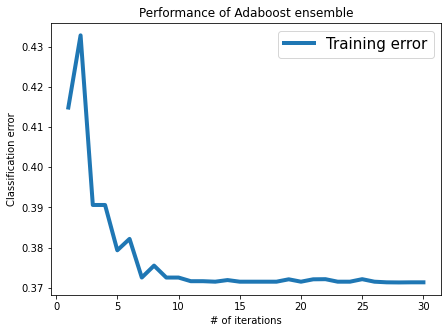

In [47]:
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(list(range(1,31)), error_all, '-', linewidth=4.0, label='Training error')
plt.title('Performance of Adaboost ensemble')
plt.xlabel('# of iterations')
plt.ylabel('Classification error')
plt.legend(loc='best', prop={'size':15})

plt.rcParams.update({'font.size': 16})

### Evaluation on the test data

Performing well on the training data is cheating, so lets make sure it works on the `test_data` as well. Here, we will compute the classification error on the `test_data` at the end of each iteration.

In [48]:
test_error_all = []
for n in range(1, 31):
    predictions = predict_adaboost(stump_weights[:n], tree_stumps[:n], test_data)
    error = 1.0 - accuracy_score(test_data[target], predictions)
    test_error_all.append(error)
    print("Iteration %s, test error = %s" % (n, test_error_all[n-1]))

Iteration 1, test error = 0.41037500000000005
Iteration 2, test error = 0.43174999999999997
Iteration 3, test error = 0.390875
Iteration 4, test error = 0.390875
Iteration 5, test error = 0.37825
Iteration 6, test error = 0.380375
Iteration 7, test error = 0.37175
Iteration 8, test error = 0.37612500000000004
Iteration 9, test error = 0.37175
Iteration 10, test error = 0.37175
Iteration 11, test error = 0.371625
Iteration 12, test error = 0.371625
Iteration 13, test error = 0.369375
Iteration 14, test error = 0.37112500000000004
Iteration 15, test error = 0.369375
Iteration 16, test error = 0.369375
Iteration 17, test error = 0.369375
Iteration 18, test error = 0.369375
Iteration 19, test error = 0.36924999999999997
Iteration 20, test error = 0.369375
Iteration 21, test error = 0.36924999999999997
Iteration 22, test error = 0.367625
Iteration 23, test error = 0.369375
Iteration 24, test error = 0.369375
Iteration 25, test error = 0.367625
Iteration 26, test error = 0.369375
Iteration 2

### Visualize both the training and test errors

Now, let us plot the training & test error with the number of iterations.

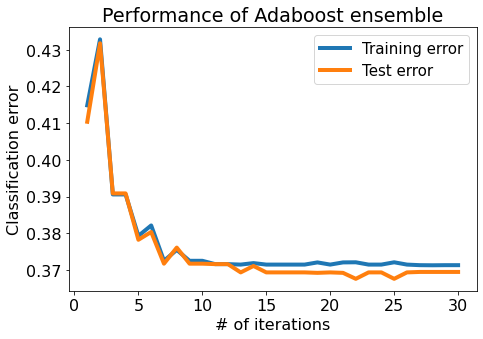

In [49]:
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(list(range(1,31)), error_all, '-', linewidth=4.0, label='Training error')
plt.plot(list(range(1,31)), test_error_all, '-', linewidth=4.0, label='Test error')

plt.title('Performance of Adaboost ensemble')
plt.xlabel('# of iterations')
plt.ylabel('Classification error')
plt.rcParams.update({'font.size': 16})
plt.legend(loc='best', prop={'size':15})
plt.tight_layout()

**Question** ii: From this plot (with 30 trees), is there massive overfitting as the # of iterations increases?

My answer: Based on this plot, the test and training error are both close to each other and relatively low. So it seems that there is not massive overfitting even with having many trees.